# Explore data

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
data_file = 'data/fifa/players_20.csv'
P = pd.read_csv(data_file, index_col=0, usecols=range(77))

In [3]:
P.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,94,75,96,33,37,26,6,11,15,14
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,82,85,95,28,32,24,7,11,15,14
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,90,90,94,27,26,29,9,9,15,15
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,65,11,68,27,12,18,87,92,78,90
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,89,88,91,34,27,22,11,12,6,8


In [4]:
for k, v in P.dtypes.items():
    print(k, v)

player_url object
short_name object
long_name object
age int64
dob object
height_cm int64
weight_kg int64
nationality object
club object
overall int64
potential int64
value_eur int64
wage_eur int64
player_positions object
preferred_foot object
international_reputation int64
weak_foot int64
skill_moves int64
work_rate object
body_type object
real_face object
release_clause_eur float64
player_tags object
team_position object
team_jersey_number float64
loaned_from object
joined object
contract_valid_until float64
nation_position object
nation_jersey_number float64
pace float64
shooting float64
passing float64
dribbling float64
defending float64
physic float64
gk_diving float64
gk_handling float64
gk_kicking float64
gk_reflexes float64
gk_speed float64
gk_positioning float64
player_traits object
attacking_crossing int64
attacking_finishing int64
attacking_heading_accuracy int64
attacking_short_passing int64
attacking_volleys int64
skill_dribbling int64
skill_curve int64
skill_fk_accuracy i

## Data visualization

In [5]:
import matplotlib.pyplot as plt

In [6]:
cols = ['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'value_eur']

In [7]:
S = P[cols]

In [8]:
S.describe()

,age,height_cm,weight_kg,overall,value_eur
count,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04
mean,25.283291,181.362184,75.276343,66.244994,2.484038e+06
std,4.656964,6.756961,7.047744,6.949953,5.585481e+06
min,16.000000,156.000000,50.000000,48.000000,0.000000e+00
25%,22.000000,177.000000,70.000000,62.000000,3.250000e+05
50%,25.000000,181.000000,75.000000,66.000000,7.000000e+05
75%,29.000000,186.000000,80.000000,71.000000,2.100000e+06
max,42.000000,205.000000,110.000000,94.000000,1.055000e+08


In [9]:
S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 158023 to 233449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   short_name   18278 non-null  object
 1   age          18278 non-null  int64 
 2   height_cm    18278 non-null  int64 
 3   weight_kg    18278 non-null  int64 
 4   nationality  18278 non-null  object
 5   club         18278 non-null  object
 6   overall      18278 non-null  int64 
 7   value_eur    18278 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.3+ MB


In [10]:
S.isna().any()

short_name     False
age            False
height_cm      False
weight_kg      False
nationality    False
club           False
overall        False
value_eur      False
dtype: bool

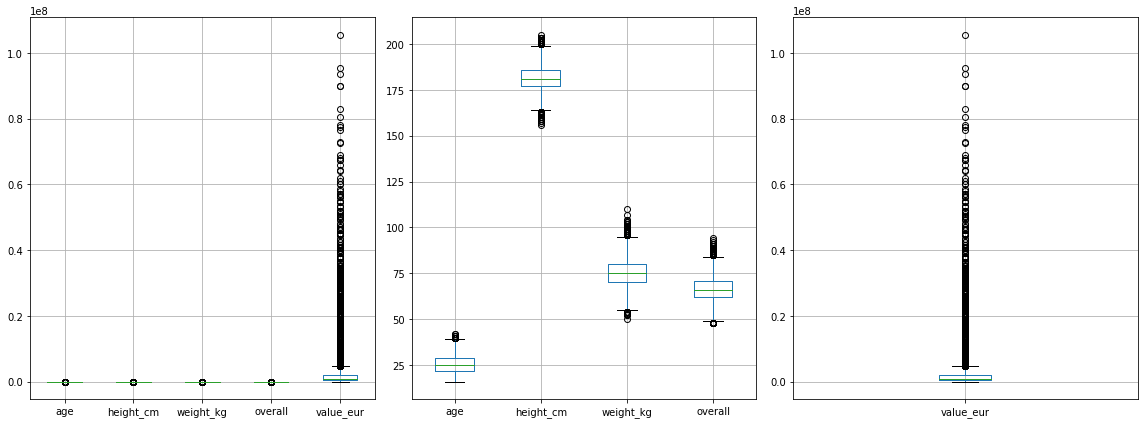

In [11]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=3)
S.boxplot(ax=ax[0])
S[['age', 'height_cm', 'weight_kg', 'overall']].boxplot(ax=ax[1])
S[['value_eur']].boxplot(ax=ax[2])
plt.tight_layout()
plt.show()

In [12]:
N = S.select_dtypes(exclude='object')

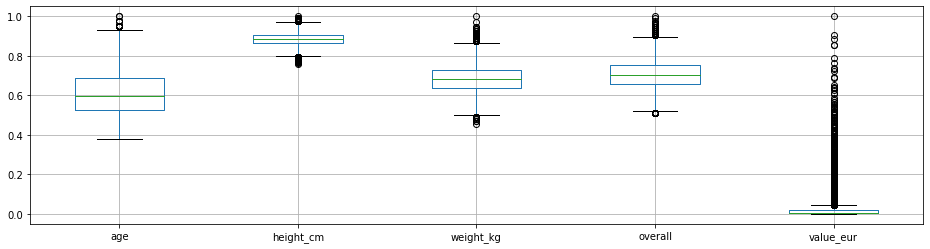

In [13]:
fig, ax = plt.subplots(figsize=(16, 4))
(N / N.max(axis=0)).boxplot(ax=ax)
plt.show()

### Check for unique values and group by

In [ ]:
S.nationality.unique()

In [22]:
G = S.groupby(['nationality', 'club']).count()

In [23]:
G

short_name  age  height_cm  weight_kg  overall  \
nationality club                                                                
Afghanistan SV Meppen                   1    1          1          1        1   
            Stevenage                   1    1          1          1        1   
Albania     1. FC Magdeburg             1    1          1          1        1   
            AC Ajaccio                  1    1          1          1        1   
            AFC Wimbledon               1    1          1          1        1   
...                                   ...  ...        ...        ...      ...   
Zimbabwe    Nottingham Forest           1    1          1          1        1   
            Sparta Praha                1    1          1          1        1   
            Stabæk Fotball              1    1          1          1        1   
            Stade de Reims              1    1          1          1        1   
            Yeni Malatyaspor            1    1          1          1        1   

                               value_eur  
nationality club                          
Afghanistan SV Meppen                  1  
            Stevenage                  1  
Albania     1. FC Magdeburg            1  
            AC Ajaccio                 1  
            AFC Wimbledon              1  
...                                  ...  
Zimbabwe    Nottingham Forest          1  
            Sparta Praha               1  
            Stabæk Fotball             1  
            Stade de Reims             1  
            Yeni Malatyaspor           1  

[5284 rows x 6 columns]

In [24]:
S.groupby(['nationality', 'club']).agg(meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'))

meanage  sumvalue
nationality club                                
Afghanistan SV Meppen             27.0    450000
            Stevenage             22.0    350000
Albania     1. FC Magdeburg       33.0    450000
            AC Ajaccio            23.0    950000
            AFC Wimbledon         21.0    200000
...                                ...       ...
Zimbabwe    Nottingham Forest     27.0   2400000
            Sparta Praha          33.0   1500000
            Stabæk Fotball        29.0    650000
            Stade de Reims        23.0    750000
            Yeni Malatyaspor      23.0    950000

[5284 rows x 2 columns]

In [25]:
A = S.groupby(['nationality', 'club']).agg(
    meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'), count=('short_name', 'count'))

In [29]:
[i for i, x in enumerate(A.index.get_level_values('club') == 'Juventus') if x]

[205,
 562,
 715,
 1129,
 1271,
 1901,
 2154,
 2573,
 3218,
 3686,
 3786,
 4885,
 5094,
 5228]

In [30]:
A.iloc[A.index.get_level_values('club') == 'Juventus']

,,meanage,sumvalue,count
nationality,club,,,
Argentina,Juventus,28.000000,111000000,2
Bosnia Herzegovina,Juventus,29.000000,42500000,1
Brazil,Juventus,26.000000,79000000,4
Colombia,Juventus,31.000000,22500000,1
Croatia,Juventus,28.500000,28000000,2
France,Juventus,25.333333,59000000,3
Germany,Juventus,28.500000,42500000,2
Italy,Juventus,27.333333,150475000,12
Netherlands,Juventus,19.000000,50000000,1


#### Check the following, what's wrong?

In [ ]:
E = S.groupby(['short_name', 'club']).agg(
    meanage=('age', 'mean'), sumvalue=('value_eur', 'sum'), count=('short_name', 'count'))

## Visualize

In [34]:
X = S.sort_values(by='value_eur', ascending=False)

In [35]:
X.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,value_eur
sofifa_id,,,,,,,,
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,105500000
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,95500000
231747,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,93500000
192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,90000000
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,90000000


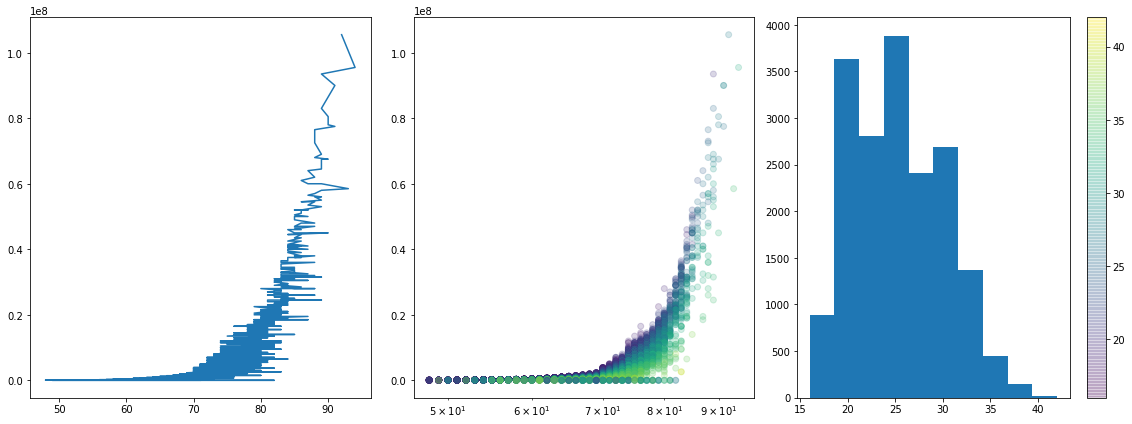

In [46]:
fig, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=3)
ax[0].plot(X.overall.values, X.value_eur.values)
im = ax[1].scatter(X.overall.values, X.value_eur.values, alpha=0.2, c=X.age)
ax[1].set_xscale('log')
ax[2].hist(X.age)
fig.colorbar(im)
plt.tight_layout()
plt.show()

## Correlation

In [39]:
K = N.corr()

In [40]:
K

,age,height_cm,weight_kg,overall,value_eur
age,1.000000,0.081391,0.237169,0.464305,0.081513
height_cm,0.081391,1.000000,0.768816,0.039945,0.009527
weight_kg,0.237169,0.768816,1.000000,0.156522,0.051782
overall,0.464305,0.039945,0.156522,1.000000,0.638230
value_eur,0.081513,0.009527,0.051782,0.638230,1.000000


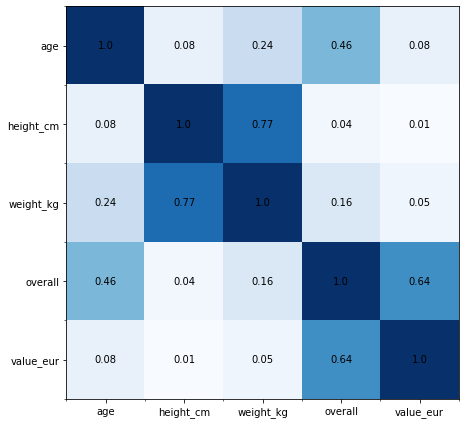

In [43]:
K = N.corr()
fig, ax = plt.subplots(figsize=(16, 6), ncols=1)
ax.imshow(K, cmap='Blues')
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        text = ax.text(i, j, round(K.iloc[i][j], 2),
                       ha="center", va="center", color="#000000")
ax.set_xticks(np.arange(K.shape[0] + 1) - .5, minor=True)
ax.set_xticklabels([None] + list(K.index))
ax.set_yticks(np.arange(K.shape[1] + 1) - .5, minor=True)
ax.set_yticklabels([None] + list(K.columns))

plt.tight_layout()
plt.show()

In [44]:
import seaborn as sns

/Users/alfio/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
def categorize(x):
    if x < 20:
        return '< 20'
    elif 20 < x <= 25:
        return '25'
    else:
        return '> 25'
    
N['groupage'] = [categorize(x) for x in N.age.values]

/Users/alfio/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [48]:
N.groupage

sofifa_id
158023    > 25
20801     > 25
190871    > 25
200389    > 25
183277    > 25
          ... 
245006      25
250995      25
252332    < 20
251110    < 20
233449    > 25
Name: groupage, Length: 18278, dtype: object

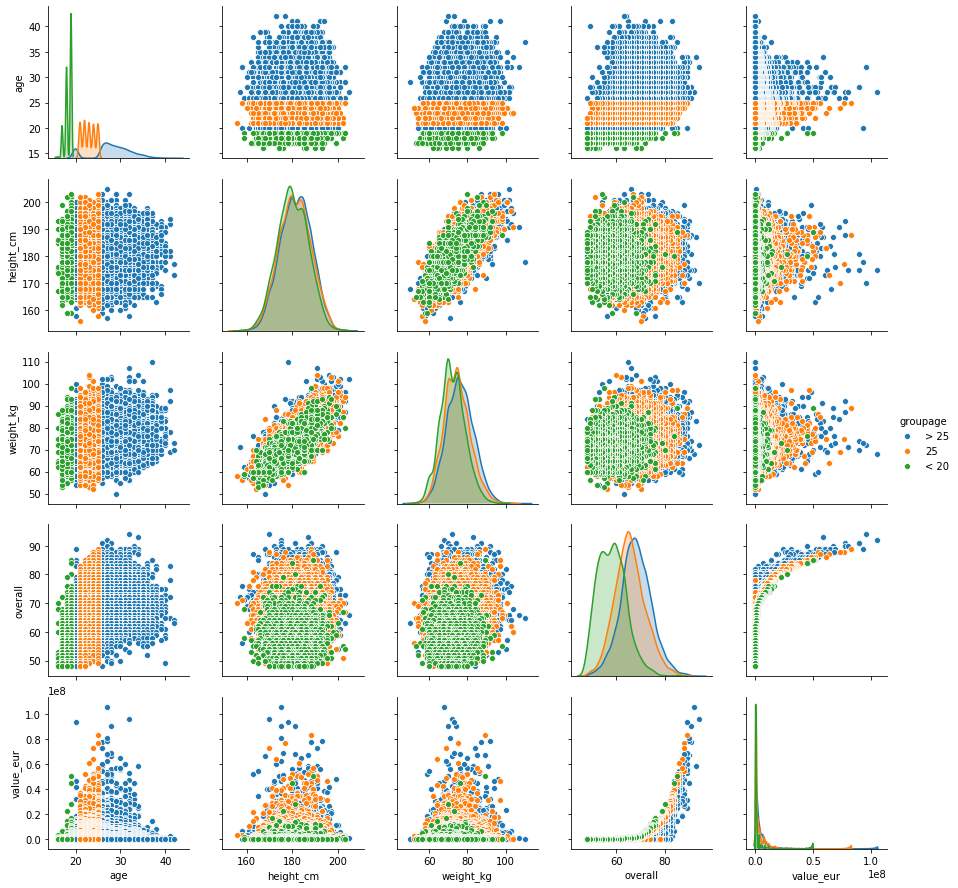

In [49]:
sns.pairplot(N, hue='groupage')
plt.show()